In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  #to scale the values between 0 and 1
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


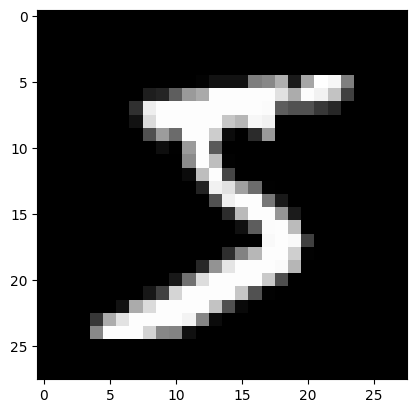

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), #first layer which will have 128 neurons. Each neuron will take all 784 pixel values for the image, and will be calculated after considering weights and bias, associated with each neuron.
  tf.keras.layers.Dropout(0.2), #Dropout layer. Drops out input node randomly by setting them to 0 (probability of doing it for a node : 20%)
  tf.keras.layers.Dense(10, activation='softmax') #Output layer, which gives 10 outputs in probabilities
])

c:\Users\ANMOL CHADHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# Compile the model
model.compile(optimizer='adam', #to adjust the learning rate (steps taken to minimize the loss)
              loss='sparse_categorical_crossentropy', #calculates loss for the model
              metrics=['accuracy']) #for evaluation

In [7]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8583 - loss: 0.4901 - val_accuracy: 0.9566 - val_loss: 0.1456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9557 - loss: 0.1504 - val_accuracy: 0.9684 - val_loss: 0.1048
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9653 - loss: 0.1130 - val_accuracy: 0.9723 - val_loss: 0.0924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9733 - loss: 0.0860 - val_accuracy: 0.9748 - val_loss: 0.0782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0772 - val_accuracy: 0.9750 - val_loss: 0.0783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0621 - val_accuracy: 0.9765 - val_loss: 0.0751
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9816 - loss: 0.0560 - val_accuracy: 0.9790 - val_loss: 0.0683
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0502 - 

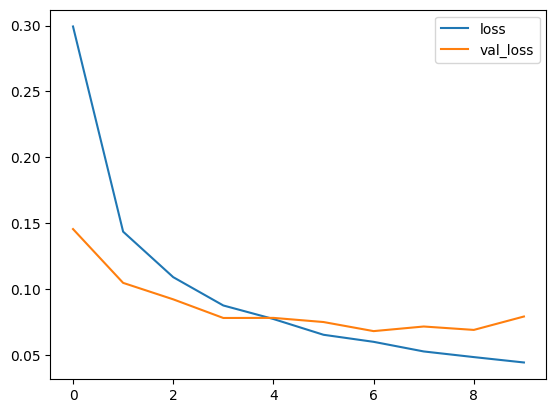

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

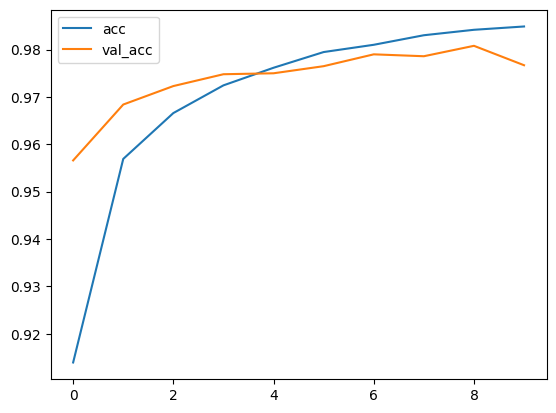

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [10]:
# Evaluate the model
print("[Testing loss, Testing Accuracy] : ",model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9730 - loss: 0.0922
[Testing loss, Testing Accuracy] :  [0.07933355122804642, 0.9767000079154968]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
Confusion matrix, without normalization
[[ 969    0    1    3    0    4    1    1    1    0]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   2    0 1007    8    1    0    1    8    5    0]
 [   0    0    3  991    0    3    0    5    4    4]
 [   2    0    2    0  952    0    5    4    2   15]
 [   2    0    0   14    1  869    3    1    2    0]
 [   4    2    1    1    2    6  940    0    2    0]
 [   0    2    9    4    0    0    0 1008    0    5]
 [   3    1    2   24    4    6    3    5  921    5]
 [   0    2    0    9    7    2    1    0    2  986]]


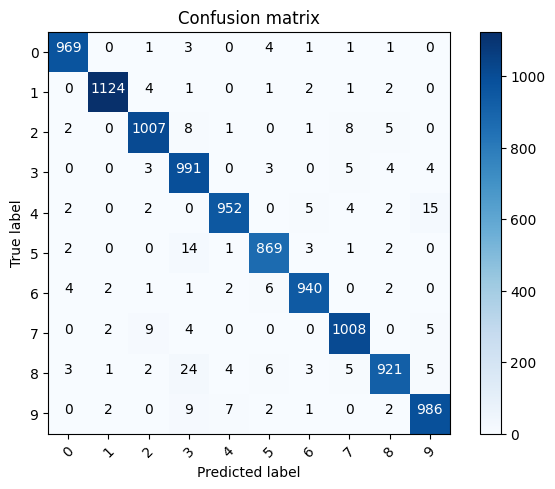

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

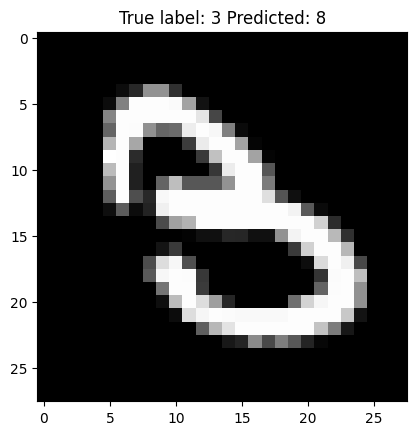

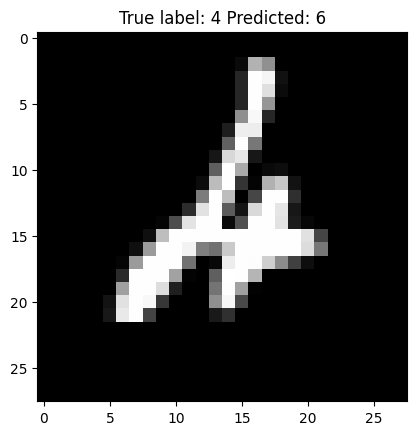

In [14]:
# Showing some misclassified examples
misclassified_idx = np.where((p_test != y_test))[0]
# misclassified_idx = np.where((p_test == y_test) & (y_test == 8))[0] (to check for a specific label)
for i in misclassified_idx[:2]:
  plt.imshow(x_test[i], cmap='gray')
  plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
  plt.show()

In [15]:
model.save("model1.keras") #Model saved, Predicion can be done by user on their own data, in prediction.py